In [1]:
import numpy as np
import pandas as pd 
#Keras is a high-level neural networks API,
# written in Python and capable of running on top of TensorFlow, CNTK, or Theano
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train = pd.read_csv('digit-recognizer/train.csv')
test = pd.read_csv('digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


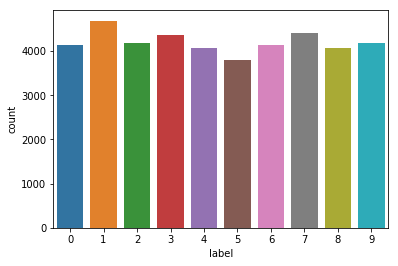

In [4]:
x_train = train.drop(columns=['label'])
y_train = train['label']
g = sns.countplot(y_train)

In [5]:
#normalization to 0-1
x_train = x_train / 255.0
test = test / 255.0
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [6]:
model = keras.models.Sequential() # Using the Sequentioal feed-forward model
model.add(keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],))) # 1st hidden layer with 128 neurons
model.add(keras.layers.Dropout(0.5)) # Randomly deactivates some neurons. (for 0.5, deactivates 50% neurons) Prevents overfitting.
model.add(keras.layers.Dense(128, activation='relu')) # 3rd hidden layer
model.add(keras.layers.Dense(10, activation='softmax')) # Output layer (using softmax activation function as we require categorical values)

In [7]:
#Initiailising parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
#Splitting in training and validation set

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=np.random.seed(2))

In [9]:
x_train = X_train
y_train = Y_train
# using 30 epochs gives around 98% accuracy
history = model.fit(x_train, y_train, epochs=30, validation_data = (X_val,Y_val)) 

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 8s 211us/step - loss: 0.3697 - acc: 0.8869 - val_loss: 0.1549 - val_acc: 0.9531
Epoch 2/30
37800/37800 [==============================] - 8s 202us/step - loss: 0.1940 - acc: 0.9408 - val_loss: 0.1188 - val_acc: 0.9624
Epoch 3/30
37800/37800 [==============================] - 8s 204us/step - loss: 0.1534 - acc: 0.9535 - val_loss: 0.1110 - val_acc: 0.9648
Epoch 4/30
37800/37800 [==============================] - 8s 204us/step - loss: 0.1324 - acc: 0.9596 - val_loss: 0.1109 - val_acc: 0.9676
Epoch 5/30
37800/37800 [==============================] - 8s 207us/step - loss: 0.1228 - acc: 0.9617 - val_loss: 0.0880 - val_acc: 0.9724
Epoch 6/30
37800/37800 [==============================] - 8s 207us/step - loss: 0.1085 - acc: 0.9658 - val_loss: 0.0886 - val_acc: 0.9705
Epoch 7/30
37800/37800 [==============================] - 8s 208us/step - loss: 0.0997 - acc: 0.9678 - val_loss: 0.0879 - v

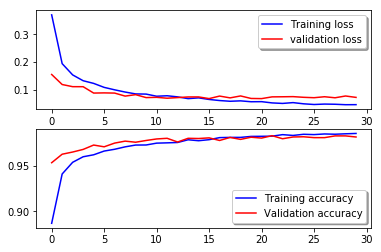

In [10]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

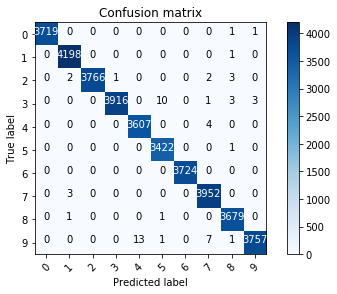

In [11]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = y_train
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [12]:
predictions = model.predict([test])
predictions

array([[2.4743321e-17, 2.8986338e-15, 1.0000000e+00, ..., 7.3837559e-12,
        4.3758171e-15, 2.1983483e-19],
       [1.0000000e+00, 4.2162818e-22, 1.0314965e-13, ..., 3.9012372e-15,
        4.3509475e-16, 7.2981807e-15],
       [6.0205885e-09, 6.3349816e-08, 6.6010358e-08, ..., 5.0011995e-06,
        9.2418404e-06, 9.9934477e-01],
       ...,
       [9.6072333e-22, 4.2405064e-12, 4.8851426e-12, ..., 4.7290077e-10,
        7.8029409e-11, 6.9096551e-09],
       [4.7926225e-08, 5.7029031e-10, 9.7226894e-07, ..., 1.2241853e-04,
        6.7266745e-07, 9.9789494e-01],
       [2.3931774e-18, 1.7835634e-15, 1.0000000e+00, ..., 3.7248918e-13,
        5.3497563e-16, 7.3548810e-17]], dtype=float32)

In [13]:
#Checking validation loss and acc
val_loss, val_acc = model.evaluate(X_val, Y_val)
print(val_loss, val_acc)

4200/4200 [==============================] - 0s 46us/step
0.07239831615620504 0.9811904761904762


In [14]:
results = np.argmax(predictions,axis = 1) 
results = pd.Series(results,name="Label")

In [15]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [16]:
#submission.to_csv('submission.csv', index=False)